# Activity 2.1 : Convolutional Neural Network


#### Objective(s):

This activity aims to introduce how to build a convolutional neural network


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to build and train convolutional neural network
- Evaluate the accuracy and loss of the model using convolutional neural network


#### Resources:

- Jupyter Notebook
- CIFAR-10 dataset


#### Procedures

Load the necessary libraries


In [11]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

- Shuffle the data
- Split the data into train and test sets


In [2]:
def plot_loss_acc(values,model_name='Model'):
    labels = ['loss','accuracy']
    colors = ['#1f77b4', '#2ca02c']
    plt.figure(figsize=(5,1.2))
    plt.table(cellText=[[labels[0],"{:.4f}".format(values[0])], [labels[1], "{:.2%}".format(values[1])]],
            colWidths=[0.8, 0.8],
            cellLoc='center',
            loc='center',
            cellColours=[['lightgrey', colors[0]], ['lightgrey', colors[1]]])
    plt.title(model_name+' Loss and Accuracy',y=0.7)
    plt.axis('off')
    plt.tight_layout() 

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross Entropy Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
import pandas as pd
"""
def get_label(label):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return classes[label]
"""
def to_csv(x,y,name):
    x = x.reshape(x.shape[0],-1)
    temp_df = pd.DataFrame(x)
    temp_df['label'] = [label[0] for label in y]
    temp_df.to_csv(f'{name}.csv', index=False)
    print(name,'saved successfully')

#to_csv(x_train, y_train, 'train')
#to_csv(x_test, y_test, 'test')

Check the image size


In [5]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images


[9]


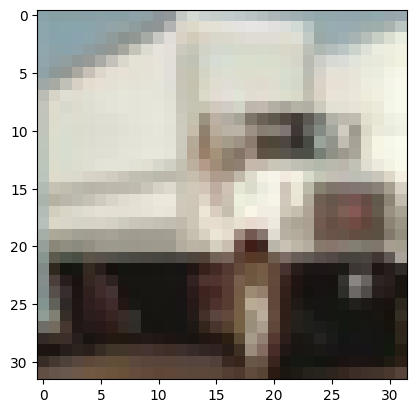

In [6]:
print(y_train[444])
plt.imshow(x_train[444]);

In [4]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position


In [8]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential


In [10]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

- Use batch size of 32
- Initiate RMSprop optimizer
- Train the model using RMSprop


In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
model1_time = time() - start

Epoch 1/15


1563/1563 [==============================] - 20s 11ms/step - loss: 1.7350 - accuracy: 0.3639 - val_loss: 1.4550 - val_accuracy: 0.4734
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4540 - accuracy: 0.4772 - val_loss: 1.2840 - val_accuracy: 0.5395
Epoch 3/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3431 - accuracy: 0.5169 - val_loss: 1.2421 - val_accuracy: 0.5584
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2730 - accuracy: 0.5460 - val_loss: 1.1404 - val_accuracy: 0.5996
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2226 - accuracy: 0.5660 - val_loss: 1.1969 - val_accuracy: 0.5861
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1817 - accuracy: 0.5824 - val_loss: 1.2175 - val_accuracy: 0.5672
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1537 - accuracy: 0.5923 - val_loss: 1.1066

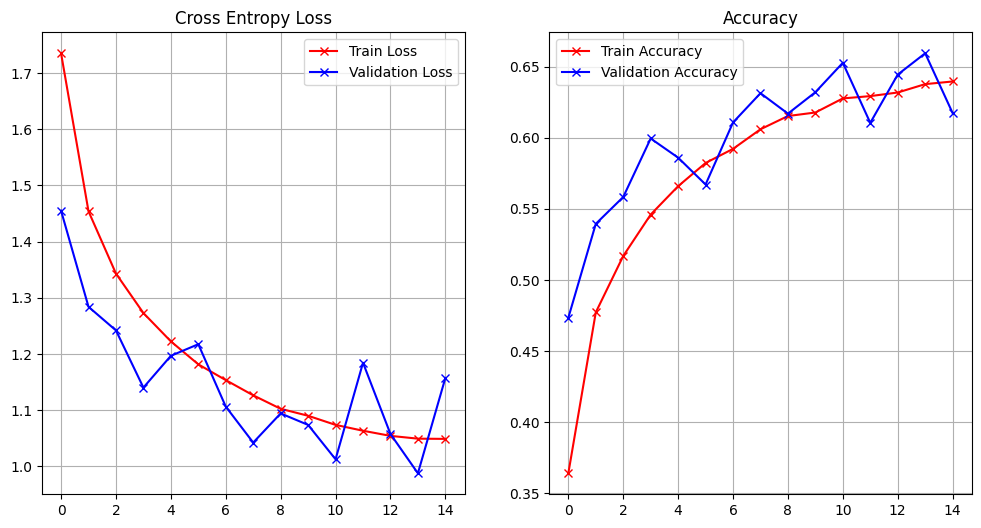

In [12]:
plot_loss_accuracy(history)

The loss of both training and validation sets are close to each other albeit in a high value at 1.1. Meanwhile, the accuracy is going up to a low number of sixty percent. The model's prediction performance is bad. More training is needed and modifying some paramters might increase the performance.


1563/1563 [==============================] - 7s 4ms/step - loss: 0.9985 - accuracy: 0.6671


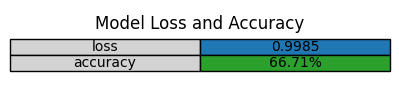

In [13]:
model1_train_eval = model_1.evaluate(x_train,y_train)
plot_loss_acc(model1_train_eval)

313/313 [==============================] - 1s 4ms/step - loss: 1.1575 - accuracy: 0.6175


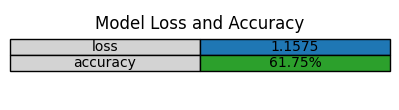

In [14]:
model1_test_eval = model_1.evaluate(x_test,y_test)
plot_loss_acc(model1_test_eval)

The model took a little more than five minutes to train in fifteen epochs. With a learning rate of 0.005, the model got a pretty high cross entropy loss at around 1 and an accuracy around 60 to 70 percent in training and testing dataset. The accuracy of the model is extremely poor in both training and validation sets. Modification of the network and parameters might increase its performance.


#### Supplementary Activity


- Build a more complicated model with the following pattern:
  Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

- Write the number of parameters of your model and compare it to the previous model

- Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

- Use different structures and run times, and see how accurate your model can be.


In [15]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
#Flatten
model_2.add(Flatten())
#Dense
model_2.add(Dense(512))

#Final Classification
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

![Alt text](Model1andModel2..png)


The second model have 232, 426 total paramters all of which are trainable. This model's first and second convolution layers are identical to the first one with 2, 432 and 25, 632 parameters. They also have identical number of paramters in dense and in the final classification dense with the first model at 147, 968 and 5130 parameters. The difference is that the second model have two more convolutional layer adding two 25, 632 paramters. Thus, the second model is up by 50, 000 parameters.


In [16]:
batch_size = 32
epoch = 5

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))
model2_time = time() - start

Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 1.6783 - accuracy: 0.3847 - val_loss: 1.3604 - val_accuracy: 0.5001
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3103 - accuracy: 0.5318 - val_loss: 1.1482 - val_accuracy: 0.5866
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.1653 - accuracy: 0.5893 - val_loss: 1.0435 - val_accuracy: 0.6311
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.0752 - accuracy: 0.6234 - val_loss: 0.9916 - val_accuracy: 0.6556
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.0053 - accuracy: 0.6499 - val_loss: 1.1339 - val_accuracy: 0.6106


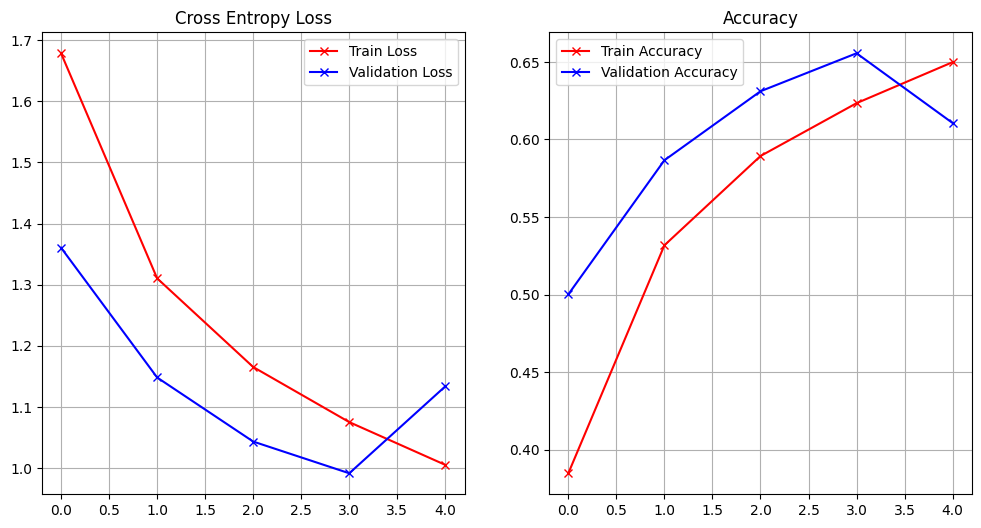

In [17]:
plot_loss_accuracy(history_2)

1563/1563 [==============================] - 37s 23ms/step - loss: 1.0503 - accuracy: 0.6353


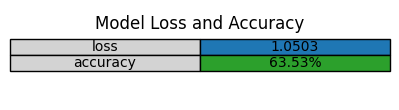

In [18]:
model2_train_eval = model_2.evaluate(x_train,y_train)
plot_loss_acc(model2_train_eval)

313/313 [==============================] - 7s 23ms/step - loss: 1.1339 - accuracy: 0.6106


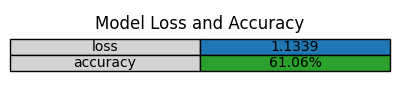

In [19]:
model2_test_eval = model_2.evaluate(x_test,y_test)
plot_loss_acc(model2_test_eval)

(0.0, 1.0, 0.0, 1.0)

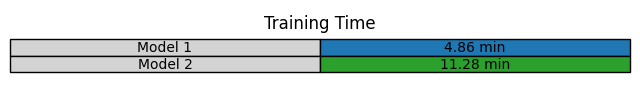

In [20]:
labels = ['Model 1','Model 2']
colors = ['#1f77b4', '#2ca02c']
plt.figure(figsize=(5,1.2))
plt.table(cellText=[[labels[0],"{:.2f} min".format(model1_time/60)], [labels[1], "{:.2f} min".format(model2_time/60)]],
        colWidths=[0.8, 0.8],
        cellLoc='center',
        loc='center',
        cellColours=[['lightgrey', colors[0]], ['lightgrey', colors[1]]])
plt.title('Training Time',y=0.7)
plt.axis('off')

Trying to increase the accuracy


In [21]:
from keras.layers import AveragePooling2D
#Lenet
model_3 = Sequential()

#Conv1
model_3.add(Conv2D(6, (5, 5), strides=(1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('tanh'))

#AvePool1
model_3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))

#Conv2
model_3.add(Conv2D(16, (5, 5), strides=(1,1)))
model_3.add(Activation('tanh'))

#AvePool2
model_3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))

#Conv3
model_3.add(Conv2D(120, (5, 5), strides=(1,1)))
model_3.add(Activation('tanh'))

#Flatten
model_3.add(Flatten())

#Dense
model_3.add(Dense(120, activation='tanh'))

#Dense
model_3.add(Dense(84, activation='tanh'))

#Final Classification
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 6)         0         
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 activation_10 (Activation)  (None, 12, 12, 16)        0         
                                                      

In [22]:
from keras.optimizers import Adam
batch_size = 100
epoch = 20
opt = Adam(learning_rate=0.0001)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))
model3_time = time() - start

Epoch 1/20
500/500 [==============================] - 18s 32ms/step - loss: 2.0291 - accuracy: 0.2531 - val_loss: 1.8520 - val_accuracy: 0.3554
Epoch 2/20
500/500 [==============================] - 16s 31ms/step - loss: 1.8821 - accuracy: 0.3267 - val_loss: 1.7857 - val_accuracy: 0.3746
Epoch 3/20
500/500 [==============================] - 16s 32ms/step - loss: 1.8383 - accuracy: 0.3479 - val_loss: 1.7592 - val_accuracy: 0.3895
Epoch 4/20
500/500 [==============================] - 16s 31ms/step - loss: 1.8187 - accuracy: 0.3563 - val_loss: 1.7391 - val_accuracy: 0.3950
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 1.8061 - accuracy: 0.3650 - val_loss: 1.7256 - val_accuracy: 0.4000
Epoch 6/20
500/500 [==============================] - 15s 31ms/step - loss: 1.7936 - accuracy: 0.3702 - val_loss: 1.7143 - val_accuracy: 0.4003
Epoch 7/20
500/500 [==============================] - 16s 31ms/step - loss: 1.7793 - accuracy: 0.3733 - val_loss: 1.7047 - val_accuracy:

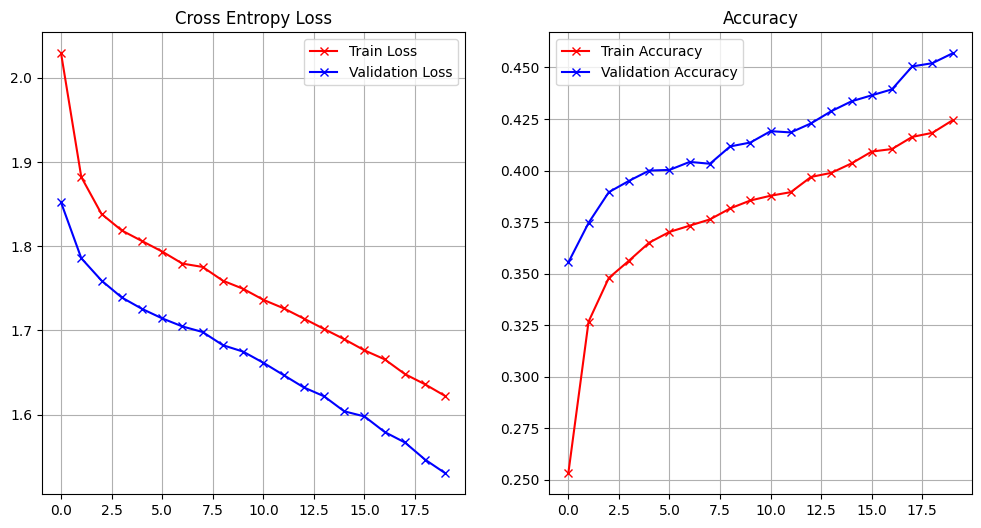

In [23]:
plot_loss_accuracy(history_3)

Epoch 1/30
500/500 [==============================] - 18s 32ms/step - loss: 1.8705 - accuracy: 0.3358 - val_loss: 1.6666 - val_accuracy: 0.3979
Epoch 2/30
500/500 [==============================] - 16s 31ms/step - loss: 1.7051 - accuracy: 0.3862 - val_loss: 1.5794 - val_accuracy: 0.4314
Epoch 3/30
500/500 [==============================] - 15s 31ms/step - loss: 1.6688 - accuracy: 0.4025 - val_loss: 1.5524 - val_accuracy: 0.4388
Epoch 4/30
500/500 [==============================] - 16s 31ms/step - loss: 1.6389 - accuracy: 0.4139 - val_loss: 1.5660 - val_accuracy: 0.4419
Epoch 5/30
500/500 [==============================] - 15s 31ms/step - loss: 1.6186 - accuracy: 0.4218 - val_loss: 1.5477 - val_accuracy: 0.4368
Epoch 6/30
500/500 [==============================] - 16s 32ms/step - loss: 1.6046 - accuracy: 0.4285 - val_loss: 1.5215 - val_accuracy: 0.4461
Epoch 7/30
500/500 [==============================] - 16s 32ms/step - loss: 1.6073 - accuracy: 0.4247 - val_loss: 1.5471 - val_accuracy:

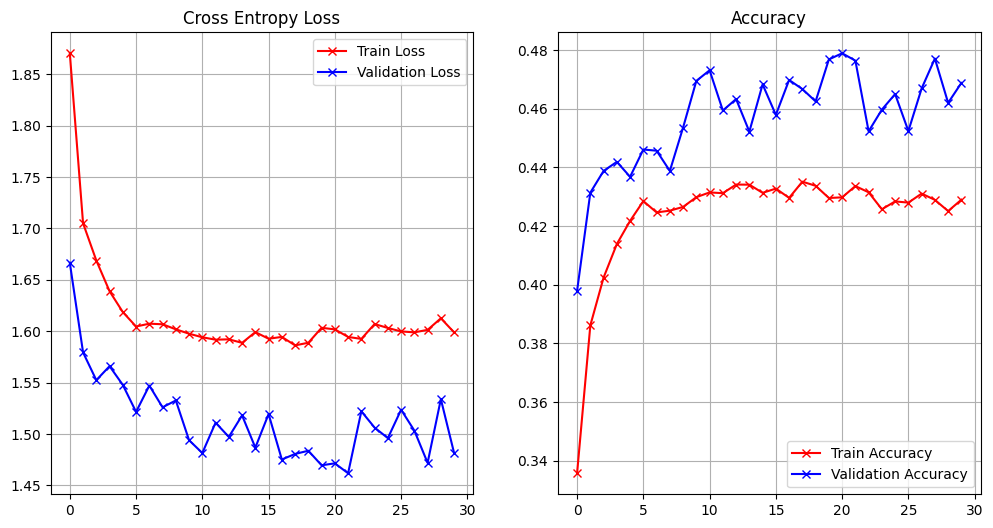

In [24]:
batch_size = 100
epoch = 30
opt = Adam(learning_rate=0.005)

model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_3_1 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

plot_loss_accuracy(history_3_1)

In [25]:
from keras.layers import AveragePooling2D, Input
#Lenet
model_4 = Sequential()

#Input
model_4.add(Input(shape=x_train.shape[1:]))

#Conv1
model_4.add(Conv2D(64, (5, 5), strides=(1,1), activation='relu'))

#AvePool1
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))

#Conv2
model_4.add(Conv2D(128, (5, 5), strides=(1,1), activation='relu'))

#AvePool2
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))

#Conv3
model_4.add(Conv2D(256, (5, 5), strides=(1,1), activation='relu'))

#Flatten
model_4.add(Flatten())

#Dense
model_4.add(Dense(128, activation='relu'))

#Dense
model_4.add(Dense(64, activation='relu'))

#Final Classification
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 128)        

Epoch 1/30
1000/1000 [==============================] - 213s 212ms/step - loss: 1.8327 - accuracy: 0.3340 - val_loss: 1.4303 - val_accuracy: 0.4881
Epoch 2/30
1000/1000 [==============================] - 160s 160ms/step - loss: 1.4098 - accuracy: 0.5094 - val_loss: 1.2013 - val_accuracy: 0.5740
Epoch 3/30
1000/1000 [==============================] - 198s 198ms/step - loss: 1.2211 - accuracy: 0.5852 - val_loss: 1.0294 - val_accuracy: 0.6420
Epoch 4/30
1000/1000 [==============================] - 187s 187ms/step - loss: 1.0952 - accuracy: 0.6300 - val_loss: 0.9754 - val_accuracy: 0.6673
Epoch 5/30
1000/1000 [==============================] - 235s 235ms/step - loss: 1.0059 - accuracy: 0.6666 - val_loss: 0.9059 - val_accuracy: 0.6894
Epoch 6/30
1000/1000 [==============================] - 158s 158ms/step - loss: 0.9341 - accuracy: 0.6930 - val_loss: 0.9023 - val_accuracy: 0.6903
Epoch 7/30
1000/1000 [==============================] - 260s 260ms/step - loss: 0.8724 - accuracy: 0.7140 - val_

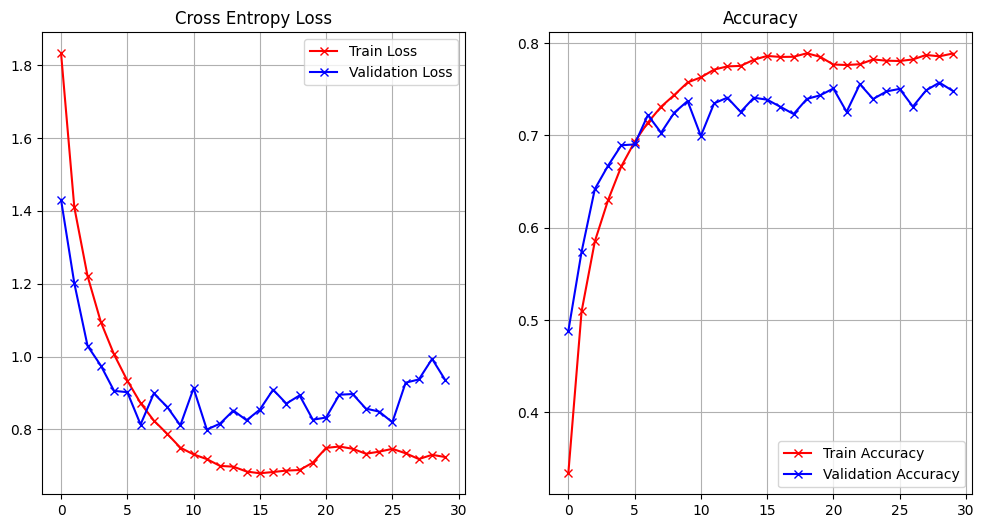

In [26]:
batch_size = 50
epoch = 30
opt = keras.optimizers.RMSprop(learning_rate=0.0005)

model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_4 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))
model4_time = time() - start
plot_loss_accuracy(history_4)

In [27]:
model_5 = Sequential()

#Input
model_5.add(Input(shape=x_train.shape[1:]))

#Conv1
model_5.add(Conv2D(32, (5, 5), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_5.add(BatchNormalization())

#MaxPool1
model_5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Dropout(0.25))

#Conv2
model_5.add(Conv2D(64, (5, 5), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_5.add(BatchNormalization())

#MaxPool2
model_5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Dropout(0.25))

#Conv3
model_5.add(Conv2D(128, (5, 5), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_5.add(BatchNormalization())

#MaxPool3
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

#Conv4
model_5.add(Conv2D(256, (5, 5), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_5.add(BatchNormalization())

#MaxPool4
model_5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Dropout(0.25))

#Flatten
model_5.add(Flatten())

#Final Classification
model_5.add(Dropout(0.5))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)       

Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 1.9688 - accuracy: 0.4423
Epoch 1: val_accuracy improved from -inf to 0.36400, saving model to best_model.h5
500/500 [==============================] - 306s 607ms/step - loss: 1.9688 - accuracy: 0.4423 - val_loss: 2.2678 - val_accuracy: 0.3640
Epoch 2/20


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - ETA: 0s - loss: 1.4325 - accuracy: 0.5937
Epoch 2: val_accuracy improved from 0.36400 to 0.60330, saving model to best_model.h5
500/500 [==============================] - 302s 603ms/step - loss: 1.4325 - accuracy: 0.5937 - val_loss: 1.2901 - val_accuracy: 0.6033
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 1.2494 - accuracy: 0.6496
Epoch 3: val_accuracy improved from 0.60330 to 0.65150, saving model to best_model.h5
500/500 [==============================] - 298s 597ms/step - loss: 1.2494 - accuracy: 0.6496 - val_loss: 1.1712 - val_accuracy: 0.6515
Epoch 4/20
500/500 [==============================] - ETA: 0s - loss: 1.1514 - accuracy: 0.6841
Epoch 4: val_accuracy did not improve from 0.65150
500/500 [==============================] - 302s 604ms/step - loss: 1.1514 - accuracy: 0.6841 - val_loss: 1.1900 - val_accuracy: 0.6335
Epoch 5/20
500/500 [==============================] - ETA: 0s - loss: 1.0846 - accuracy: 0.7070

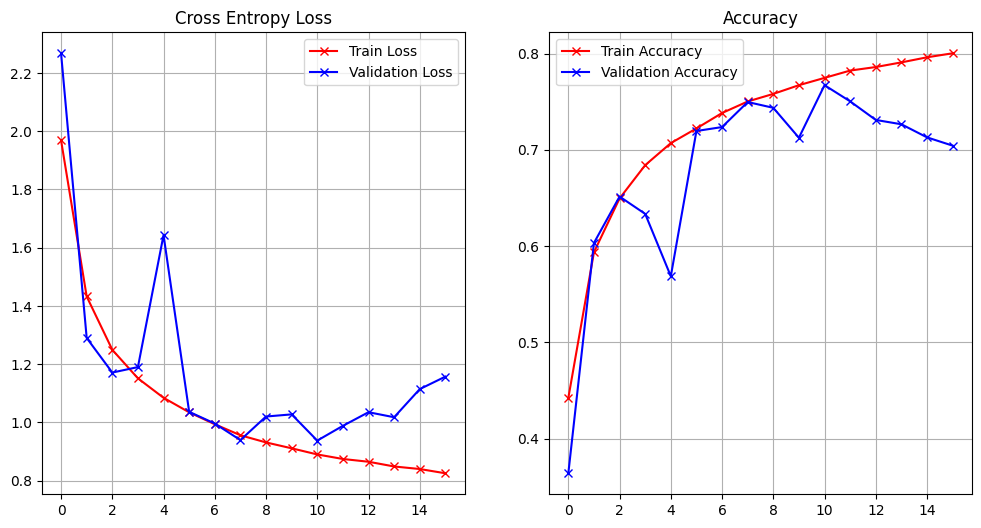

In [28]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 20
opt = keras.optimizers.RMSprop(learning_rate=0.001)

model_5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_5 = model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model5_time = time() - start
plot_loss_accuracy(history_5)


(0.0, 1.0, 0.0, 1.0)

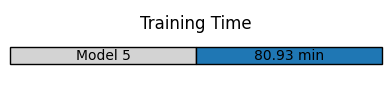

In [29]:
labels = ['Model 5']
colors = ['#1f77b4']
plt.figure(figsize=(3,1.2))
plt.table(cellText=[[labels[0],"{:.2f} min".format(model5_time/60)]],
        colWidths=[0.8, 0.8],
        cellLoc='center',
        loc='center',
        cellColours=[['lightgrey', colors[0]]])
plt.title('Training Time',y=0.7)
plt.axis('off')

In [30]:
model_6 = Sequential()

#Input
model_6.add(Input(shape=x_train.shape[1:]))

#Conv1
model_6.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())
model_6.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())

#MaxPool1
model_6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_6.add(Dropout(0.25))

#Conv2
model_6.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())
model_6.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())

#MaxPool2
model_6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_6.add(Dropout(0.25))

#Conv3
model_6.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())
model_6.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())

#MaxPool3
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))

#Conv4
model_6.add(Conv2D(256, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())
model_6.add(Conv2D(256, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_6.add(BatchNormalization())

#MaxPool4
model_6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_6.add(Dropout(0.25))

#Flatten
model_6.add(Flatten())

#Final Classification
model_6.add(Dropout(0.5))
model_6.add(Dense(num_classes))
model_6.add(Activation('softmax'))

model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 2.3721 - accuracy: 0.3685
Epoch 1: val_accuracy improved from -inf to 0.33540, saving model to best_model.h5
500/500 [==============================] - 292s 570ms/step - loss: 2.3721 - accuracy: 0.3685 - val_loss: 2.0628 - val_accuracy: 0.3354
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 1.6309 - accuracy: 0.5340
Epoch 2: val_accuracy improved from 0.33540 to 0.50770, saving model to best_model.h5
500/500 [==============================] - 255s 510ms/step - loss: 1.6309 - accuracy: 0.5340 - val_loss: 1.5752 - val_accuracy: 0.5077
Epoch 3/100
500/500 [==============================] - ETA: 0s - loss: 1.3849 - accuracy: 0.6037
Epoch 3: val_accuracy improved from 0.50770 to 0.62590, saving model to best_model.h5
500/500 [==============================] - 260s 520ms/step - loss: 1.3849 - accuracy: 0.6037 - val_loss: 1.1783 - val_accuracy: 0.6259
Epoch 4/100
500/500 [============================

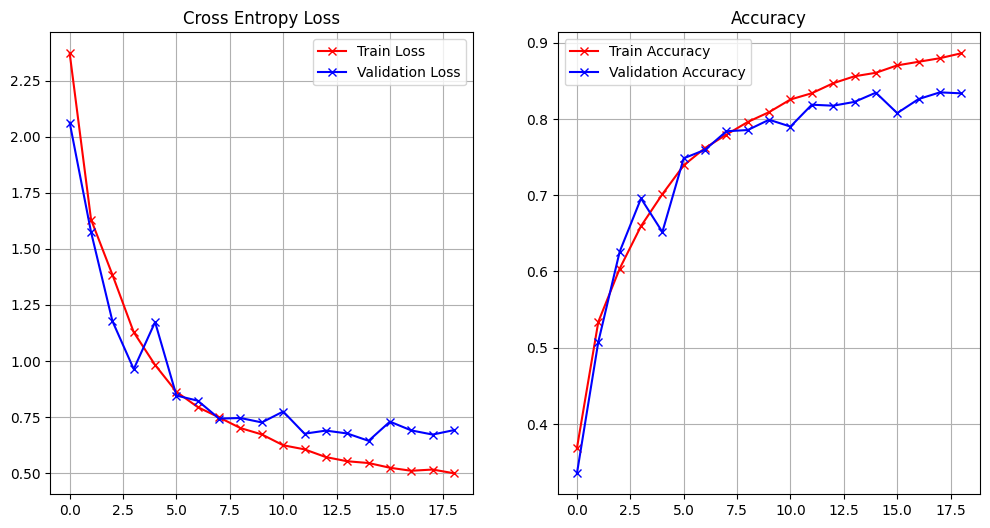

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 100

opt = Adam(learning_rate=0.0005)

model_6.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_6 = model_6.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model6_time = time() - start
plot_loss_accuracy(history_6)


(0.0, 1.0, 0.0, 1.0)

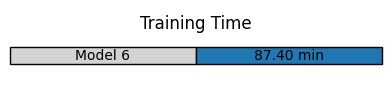

In [32]:
labels = ['Model 6']
colors = ['#1f77b4']
plt.figure(figsize=(3,1.2))
plt.table(cellText=[[labels[0],"{:.2f} min".format(model6_time/60)]],
        colWidths=[0.8, 0.8],
        cellLoc='center',
        loc='center',
        cellColours=[['lightgrey', colors[0]]])
plt.title('Training Time',y=0.7)
plt.axis('off')

In [54]:
def get_metric(model,x,y,bs=100):
    loss, acc = model.evaluate(x,y,batch_size=bs)
    return loss, acc

In [ ]:
labels = ['Model 1', 'Model 2','Model 3', 'Model 4', 'Model 5', 'Model 6']
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
total_params = []
train_losses = []
train_accs = []
test_losses = []
test_accs = []
models = [model_1, model_2, model_3, model_4, model_5, model_6]
model_times = [model1_time, model2_time, model3_time, model4_time, model5_time, model6_time]


for model in models:
    total_params.append(model.count_params())
    loss, acc = get_metric(model,x_train,y_train)
    train_losses.append(loss)
    train_accs.append(acc)
    loss, acc = get_metric(model,x_test,y_test)
    test_losses.append(loss)
    test_accs.append(acc)

(0.0, 1.0, 0.0, 1.0)

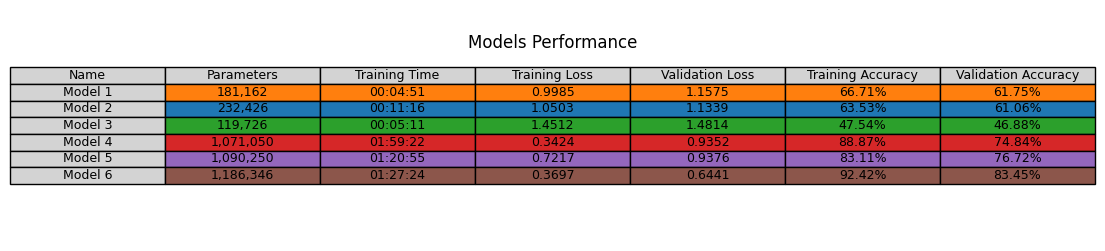

In [36]:
plt.figure(figsize=(10,3))
plt.table(cellText=[
    [labels[i], 
    '{:,}'.format(total_params[i]), 
    '{:02d}:{:02d}:{:02d}'.format(int(model_times[i] // 3600), int((model_times[i] % 3600) // 60), int(model_times[i] % 60)),
    '{:.4f}'.format(train_losses[i]),
    '{:.4f}'.format(test_losses[i]),
    '{:.2%}'.format(train_accs[i]),
    '{:.2%}'.format(test_accs[i])] for i in range(6)],
    colLabels=['Name','Parameters','Training Time','Training Loss' ,'Validation Loss','Training Accuracy', 'Validation Accuracy'],
    colWidths=[0.2]*7,
    cellLoc='center',
    loc='center',
    colColours=['lightgrey']*7,
    cellColours=[
        ['lightgrey', colors[i],colors[i],colors[i],colors[i],colors[i],colors[i]]
        for i in range(6)])

plt.title('Models Performance',y=0.8)
plt.axis('off')

In [80]:
def to_csv(columns=[],filename='data.csv'):
    num_rows = len(columns[0])
    with open(filename, 'w', newline='') as csv:
        header = ['Name','Parameters','Training Time','Training Loss' ,'Validation Loss','Training Accuracy', 'Validation Accuracy']
        csv.write(','.join([str(h) for h in header]) + '\n')
        
        for i in range(num_rows):
            row = ','.join([str(col[i]) for col in columns]) + '\n'
            csv.write(row)
columns = [labels,total_params,model_times,train_losses,test_losses,train_accs,test_accs]
#to_csv(columns,'models.csv')

In [12]:
#VGG16
l2_weight = .0001
filter_start = 32
model_7 = Sequential()

#Input
model_7.add(Input(shape=x_train.shape[1:]))

#Conv1
model_7.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())

#Pooling1
model_7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_7.add(Dropout(0.25))

#Conv2
model_7.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())

#Pooling2
model_7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_7.add(Dropout(0.3))

#Conv3
model_7.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())

#Pooling3
model_7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_7.add(Dropout(0.35))

#Conv4
model_7.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())

#Pooling4
model_7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_7.add(Dropout(0.35))


#Conv5
model_7.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_7.add(BatchNormalization())

#Pooling5
model_7.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_7.add(Dropout(0.35))

#Flatten
model_7.add(Flatten())

#Dense1
model_7.add(Dense(units=filter_start*4,activation="relu",kernel_regularizer=l2(l2_weight)))
model_7.add(Dropout(0.2))

#Dense2
model_7.add(Dense(units=filter_start*4,activation="relu",kernel_regularizer=l2(l2_weight)))

#Dense3 - softmax
model_7.add(Dropout(0.5))
model_7.add(Dense(num_classes,activation='softmax'))

model_7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 2.1990 - accuracy: 0.2559
Epoch 1: val_accuracy improved from -inf to 0.29040, saving model to model7.keras
500/500 [==============================] - 314s 614ms/step - loss: 2.1990 - accuracy: 0.2559 - val_loss: 2.0349 - val_accuracy: 0.2904
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 1.7057 - accuracy: 0.4323
Epoch 2: val_accuracy improved from 0.29040 to 0.50970, saving model to model7.keras
500/500 [==============================] - 307s 614ms/step - loss: 1.7057 - accuracy: 0.4323 - val_loss: 1.5491 - val_accuracy: 0.5097
Epoch 3/100
500/500 [==============================] - ETA: 0s - loss: 1.4490 - accuracy: 0.5539
Epoch 3: val_accuracy improved from 0.50970 to 0.60610, saving model to model7.keras
500/500 [==============================] - 301s 603ms/step - loss: 1.4490 - accuracy: 0.5539 - val_loss: 1.2466 - val_accuracy: 0.6061
Epoch 4/100
500/500 [==============================]

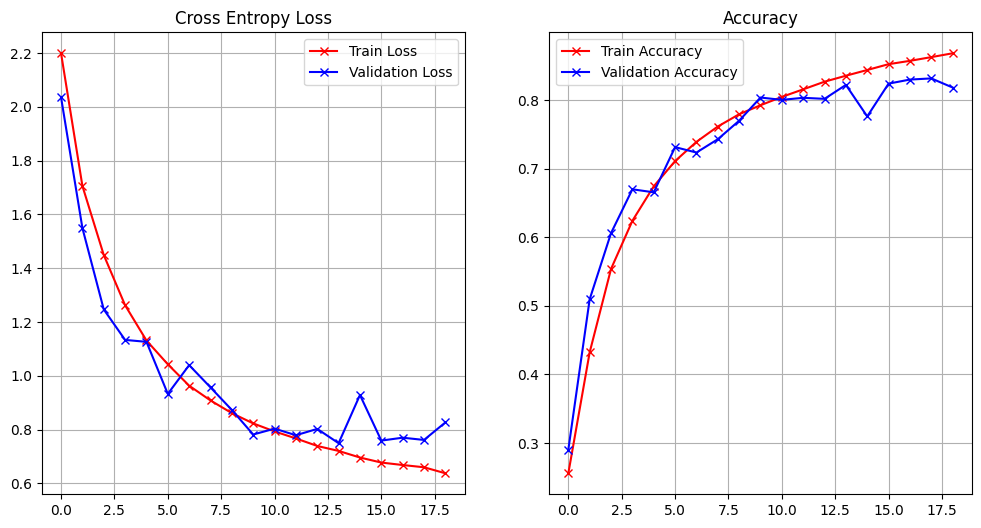

In [13]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model7.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 100
opt = Adam(learning_rate=0.0005)

model_7.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_7 = model_7.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model7_time = time() - start
plot_loss_accuracy(history_7)


In [6]:
def combine_attrs(name,model,train_time,bs=100):
    data = [name]
    data.append(model.count_params())
    data.append(train_time)
    train_loss, train_acc = model.evaluate(x_train,y_train,batch_size=bs)
    test_loss, test_acc = model.evaluate(x_test,y_test,batch_size=bs)
    data.append(train_loss)
    data.append(test_loss)
    data.append(train_acc)
    data.append(test_acc)

    return data

def add_to_csv(name,model,train_time,filename='data.csv'):
    #['Name','Parameters','Training Time','Training Loss' ,'Validation Loss','Training Accuracy', 'Validation Accuracy']
    data = combine_attrs(name, model, train_time)
    with open(filename, 'a', newline='') as csv:
        row = ','.join([str(val) for val in data]) + '\n'
        csv.write(row)

In [16]:
add_to_csv('Model 7',model_7,model7_time,'models.csv')

157/157 [==============================] - 12s 79ms/step - loss: 0.7494 - accuracy: 0.8222


In [20]:
#VGG16
l2_weight = .001
filter_start = 32
model_8 = Sequential()

#Input
model_8.add(Input(shape=x_train.shape[1:]))

#Conv1
model_8.add(Conv2D(filter_start, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))

#Pooling1
model_8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_8.add(Dropout(0.25))

#Conv2
model_8.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))

#Pooling2
model_8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_8.add(Dropout(0.3))

#Conv3
model_8.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))


#Pooling3
model_8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_8.add(Dropout(0.35))

#Conv4
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))

#Pooling4
model_8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_8.add(Dropout(0.35))


#Conv5
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))

#Pooling5
model_8.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_8.add(Dropout(0.35))

#Flatten
model_8.add(Flatten())

#Dense1
model_8.add(Dense(units=filter_start*32,activation="relu",kernel_regularizer=l2(l2_weight)))
model_8.add(Dropout(0.2))

#Dense2
model_8.add(Dense(units=filter_start*32,activation="relu",kernel_regularizer=l2(l2_weight)))

#Dense3 - softmax
model_8.add(Dropout(0.5))
model_8.add(Dense(num_classes,activation='softmax'))

model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_79 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_39 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_80 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_40 (Activation)  (None, 32, 32, 32)       

Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 4.1601 - accuracy: 0.2884
Epoch 1: val_accuracy improved from -inf to 0.36040, saving model to model8.keras
500/500 [==============================] - 409s 799ms/step - loss: 4.1601 - accuracy: 0.2884 - val_loss: 3.3079 - val_accuracy: 0.3604
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 2.3982 - accuracy: 0.5122
Epoch 2: val_accuracy improved from 0.36040 to 0.50390, saving model to model8.keras
500/500 [==============================] - 390s 780ms/step - loss: 2.3982 - accuracy: 0.5122 - val_loss: 2.2174 - val_accuracy: 0.5039
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 1.7270 - accuracy: 0.6167
Epoch 3: val_accuracy did not improve from 0.50390
500/500 [==============================] - 389s 779ms/step - loss: 1.7270 - accuracy: 0.6167 - val_loss: 2.5966 - val_accuracy: 0.4403
Epoch 4/50
500/500 [==============================] - ETA: 0s - loss: 1.4541 - accuracy: 

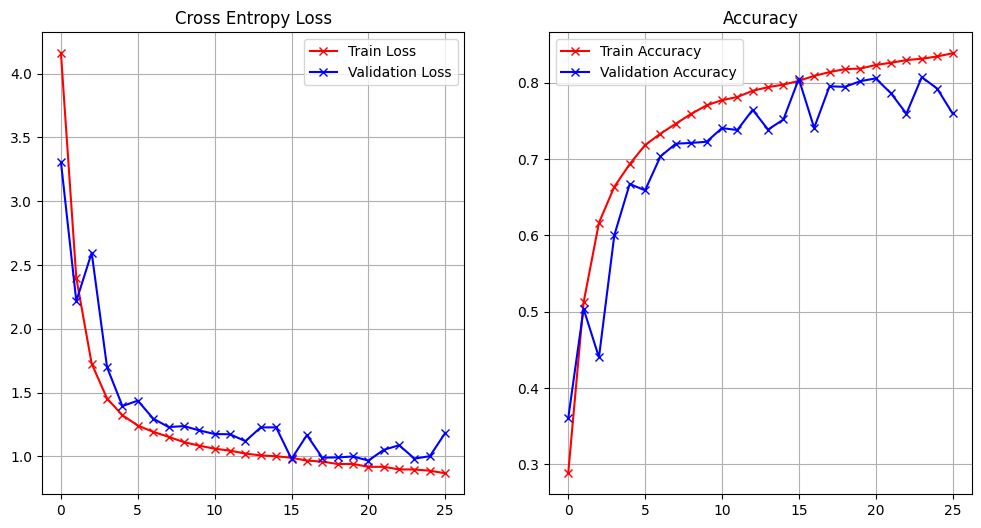

In [22]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model8.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 50
opt = Adam(learning_rate=0.0005)

model_8.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_8 = model_8.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model8_time = time() - start
plot_loss_accuracy(history_8)


In [23]:
from keras.models import load_model
saved_model7 = load_model('model7.keras')
add_to_csv('Saved Model 7',saved_model7,model7_time,'models.csv')

157/157 [==============================] - 14s 90ms/step - loss: 0.7615 - accuracy: 0.8317


In [44]:
saved_model8 = load_model('model8.keras')
add_to_csv('Model 8',saved_model8,model8_time,'models.csv')

100/100 [==============================] - 23s 225ms/step - loss: 0.9829 - accuracy: 0.8075


In [45]:
#VGG16
l2_weight = .001
filter_start = 64
model_9 = Sequential(name='Model9')

#Input
model_9.add(Input(shape=x_train.shape[1:]))

#Conv1
model_9.add(Conv2D(filter_start, (3, 3),strides=(2,2), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))
model_9.add(Conv2D(filter_start, (3, 3),strides=(2,2), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))

#Pooling1
model_9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_9.add(Dropout(0.25))

#Conv2
model_9.add(Conv2D(filter_start*2, (3, 3),strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))
model_9.add(Conv2D(filter_start*2, (3, 3),strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))

#Pooling2
model_9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_9.add(Dropout(0.3))

#Conv3
model_9.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))
model_9.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))
model_9.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(l2_weight)))
model_9.add(BatchNormalization())
model_9.add(Activation('relu'))


#Pooling3
model_9.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model_9.add(Dropout(0.3))

#Flatten
model_9.add(Flatten())

#Dense1
model_9.add(Dense(units=filter_start*4,activation="relu",kernel_regularizer=l2(l2_weight)))
model_9.add(Dropout(0.2))

#Dense2
model_9.add(Dense(units=filter_start*4,activation="relu",kernel_regularizer=l2(l2_weight)))

#Dense3 - softmax
model_9.add(Dropout(0.5))
model_9.add(Dense(num_classes,activation='softmax'))

model_9.summary()

Model: "Model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_184 (Conv2D)         (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_184 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_144 (Activation  (None, 16, 16, 64)        0         
 )                                                               
                                                                 
 conv2d_185 (Conv2D)         (None, 8, 8, 64)          36928     
                                                                 
 batch_normalization_185 (B  (None, 8, 8, 64)          256       
 atchNormalization)                                              
                                                            

Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 3.0855 - accuracy: 0.2957
Epoch 1: val_accuracy improved from -inf to 0.33920, saving model to model9.keras
500/500 [==============================] - 116s 220ms/step - loss: 3.0855 - accuracy: 0.2957 - val_loss: 2.8493 - val_accuracy: 0.3392
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.4555
Epoch 2: val_accuracy improved from 0.33920 to 0.45060, saving model to model9.keras
500/500 [==============================] - 115s 231ms/step - loss: 2.2750 - accuracy: 0.4555 - val_loss: 2.1078 - val_accuracy: 0.4506
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 1.8576 - accuracy: 0.5346
Epoch 3: val_accuracy improved from 0.45060 to 0.55370, saving model to model9.keras
500/500 [==============================] - 121s 242ms/step - loss: 1.8576 - accuracy: 0.5346 - val_loss: 1.6932 - val_accuracy: 0.5537
Epoch 4/50
500/500 [==============================] - E

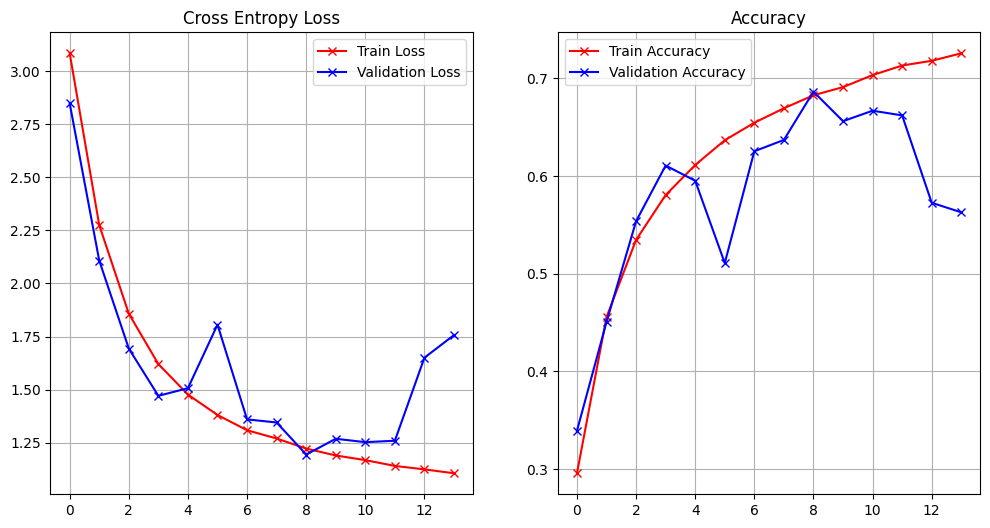

In [46]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model9.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 50
opt = Adam(learning_rate=0.0005)

model_9.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_9 = model_9.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model9_time = time() - start
plot_loss_accuracy(history_9)


In [47]:
saved_model9 = load_model('model9.keras')
add_to_csv('Model 9',saved_model9,model9_time,'models.csv')

100/100 [==============================] - 4s 43ms/step - loss: 1.1934 - accuracy: 0.6863


In [49]:
model_10 = Sequential(name='Model10')

#Input
model_10.add(Input(shape=x_train.shape[1:]))

#Conv1
model_10.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(32, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))

#MaxPool1
model_10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_10.add(Dropout(0.25))

#Conv2
model_10.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(64, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))

#MaxPool2
model_10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_10.add(Dropout(0.25))

#Conv3
model_10.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))

#MaxPool3
model_10.add(MaxPooling2D(pool_size=(2,2)))
model_10.add(Dropout(0.25))

#Conv4
model_10.add(Conv2D(256, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(256, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))
model_10.add(Conv2D(256, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model_10.add(BatchNormalization())
model_10.add(Activation('relu'))

#MaxPool4
model_10.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_10.add(Dropout(0.25))

#Flatten
model_10.add(Flatten())

#Final Classification
model_10.add(Dropout(0.5))
model_10.add(Dense(num_classes))
model_10.add(BatchNormalization())
model_10.add(Activation('softmax'))

model_10.summary()

Model: "Model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_195 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_195 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 activation_155 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 conv2d_196 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_196 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                           

Epoch 1/50
500/500 [==============================] - ETA: 0s - loss: 2.0188 - accuracy: 0.3022
Epoch 1: val_accuracy improved from -inf to 0.10200, saving model to model10.keras
500/500 [==============================] - 360s 706ms/step - loss: 2.0188 - accuracy: 0.3022 - val_loss: 2.6952 - val_accuracy: 0.1020
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 1.6455 - accuracy: 0.4638
Epoch 2: val_accuracy improved from 0.10200 to 0.47950, saving model to model10.keras
500/500 [==============================] - 356s 712ms/step - loss: 1.6455 - accuracy: 0.4638 - val_loss: 1.5803 - val_accuracy: 0.4795
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 1.4291 - accuracy: 0.5536
Epoch 3: val_accuracy improved from 0.47950 to 0.58030, saving model to model10.keras
500/500 [==============================] - 356s 712ms/step - loss: 1.4291 - accuracy: 0.5536 - val_loss: 1.3299 - val_accuracy: 0.5803
Epoch 4/50
500/500 [==============================] 

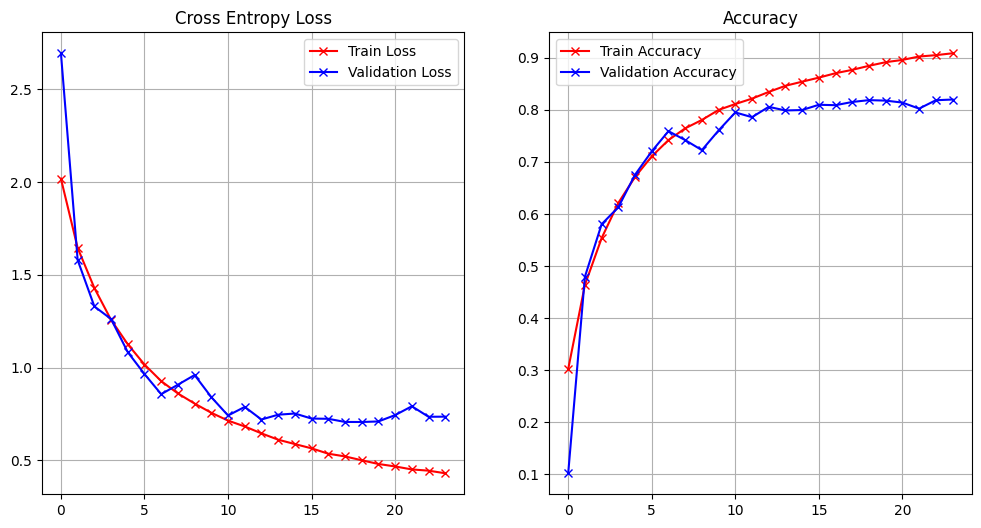

In [50]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model10.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 100
epoch = 50
opt = Adam(learning_rate=0.0003)

model_10.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_10 = model_10.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model10_time = time() - start
plot_loss_accuracy(history_10)


In [51]:
saved_model10 = load_model('model10.keras')
add_to_csv('Model 10',saved_model10,model10_time,'models.csv')

100/100 [==============================] - 23s 230ms/step - loss: 0.7064 - accuracy: 0.8186


In [8]:
model_11 = Sequential(name='Model11')

#Input
model_11.add(Input(shape=x_train.shape[1:]))

#Conv1
model_11.add(Conv2D(32, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(32, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))

#MaxPool1
model_11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_11.add(Dropout(0.3))

#Conv2
model_11.add(Conv2D(64, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(64, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))

#MaxPool2
model_11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_11.add(Dropout(0.3))

#Conv3
model_11.add(Conv2D(128, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(128, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(128, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))

#MaxPool3
model_11.add(MaxPooling2D(pool_size=(2,2)))
model_11.add(Dropout(0.3))

#Conv4
model_11.add(Conv2D(256, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(256, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))
model_11.add(Conv2D(256, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0001)))
model_11.add(BatchNormalization())
model_11.add(Activation('relu'))

#MaxPool4
model_11.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_11.add(Dropout(0.3))

#Flatten
model_11.add(Flatten())

#Final Classification
model_11.add(Dropout(0.5))
model_11.add(Dense(num_classes))
model_11.add(BatchNormalization())
model_11.add(Activation('softmax'))

model_11.summary()

Model: "Model11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0   

In [10]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model11.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

batch_size = 64
epoch = 50
opt = Adam(learning_rate=0.0002)

model_11.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_11 = model_11.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint])
model11_time = time() - start

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 1.5904 - accuracy: 0.4841
Epoch 1: val_accuracy improved from -inf to 0.49030, saving model to model11.keras
782/782 [==============================] - 1004s 1s/step - loss: 1.5904 - accuracy: 0.4841 - val_loss: 1.6137 - val_accuracy: 0.4903
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 1.2551 - accuracy: 0.6303
Epoch 2: val_accuracy improved from 0.49030 to 0.66020, saving model to model11.keras
782/782 [==============================] - 922s 1s/step - loss: 1.2551 - accuracy: 0.6303 - val_loss: 1.1478 - val_accuracy: 0.6602
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 1.0962 - accuracy: 0.6879
Epoch 3: val_accuracy improved from 0.66020 to 0.67190, saving model to model11.keras
782/782 [==============================] - 834s 1s/step - loss: 1.0962 - accuracy: 0.6879 - val_loss: 1.1280 - val_accuracy: 0.6719
Epoch 4/50
782/782 [==============================] - ETA: 0

NameError: name 'load_model' is not defined

100/100 [==============================] - 37s 369ms/step - loss: 0.6432 - accuracy: 0.8335


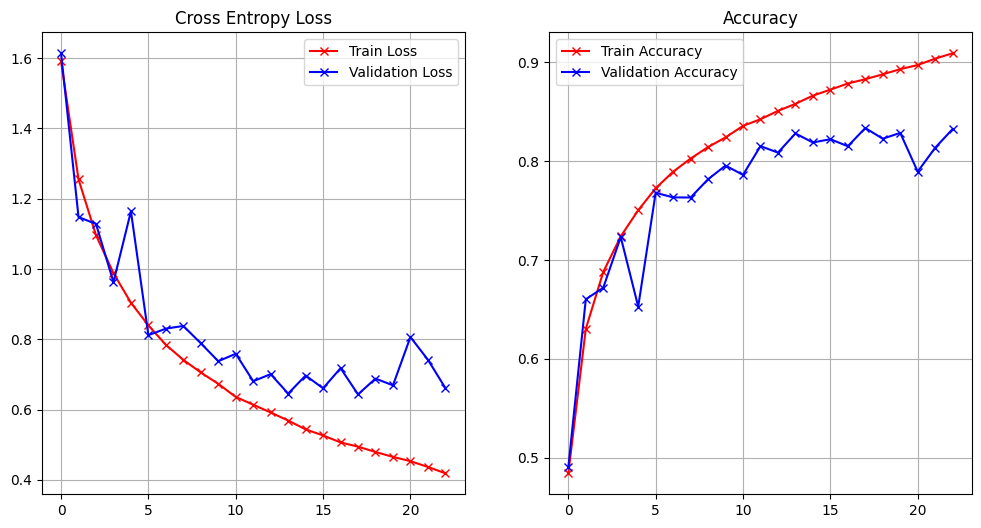

In [12]:
saved_model11 = load_model('model11.keras')
add_to_csv('Model 11',saved_model11,model11_time,'models.csv')
plot_loss_accuracy(history_11)

In [30]:
l2_weight = .001
filter_start = 40
model_12 = Sequential(name='Model12')

#Input
model_12.add(Input(shape=x_train.shape[1:]))

#Conv1
model_12.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())
model_12.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())

#Pooling1
model_12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_12.add(Dropout(0.3))

#Conv2
model_12.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())
model_12.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())

#Pooling2
model_12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_12.add(Dropout(0.3))

#Conv3
model_12.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())
model_12.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())

#Pooling3
model_12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_12.add(Dropout(0.3))

#Conv4
model_12.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())
model_12.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_12.add(BatchNormalization())

#Pooling4
model_12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_12.add(Dropout(0.3))

#Flatten
model_12.add(Flatten())

#Dense3 - softmax
model_12.add(Dropout(0.5))
model_12.add(Dense(num_classes,activation='softmax'))

model_12.summary()

Model: "Model12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 32, 32, 40)        1120      
                                                                 
 batch_normalization_115 (B  (None, 32, 32, 40)        160       
 atchNormalization)                                              
                                                                 
 conv2d_109 (Conv2D)         (None, 32, 32, 40)        14440     
                                                                 
 batch_normalization_116 (B  (None, 32, 32, 40)        160       
 atchNormalization)                                              
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 16, 16, 40)        0         
 ng2D)                                                           
                                                           

Epoch 1/80
782/782 [==============================] - ETA: 0s - loss: 3.3138 - accuracy: 0.3669
Epoch 1: val_accuracy improved from -inf to 0.46140, saving model to model12.keras
782/782 [==============================] - 354s 441ms/step - loss: 3.3138 - accuracy: 0.3669 - val_loss: 2.6702 - val_accuracy: 0.4614 - lr: 4.0000e-04
Epoch 2/80
782/782 [==============================] - ETA: 0s - loss: 2.4833 - accuracy: 0.5289
Epoch 2: val_accuracy improved from 0.46140 to 0.57900, saving model to model12.keras
782/782 [==============================] - 356s 455ms/step - loss: 2.4833 - accuracy: 0.5289 - val_loss: 2.2856 - val_accuracy: 0.5790 - lr: 4.0000e-04
Epoch 3/80
782/782 [==============================] - ETA: 0s - loss: 2.1038 - accuracy: 0.6128
Epoch 3: val_accuracy improved from 0.57900 to 0.66980, saving model to model12.keras
782/782 [==============================] - 357s 456ms/step - loss: 2.1038 - accuracy: 0.6128 - val_loss: 1.7967 - val_accuracy: 0.6698 - lr: 4.0000e-04
E

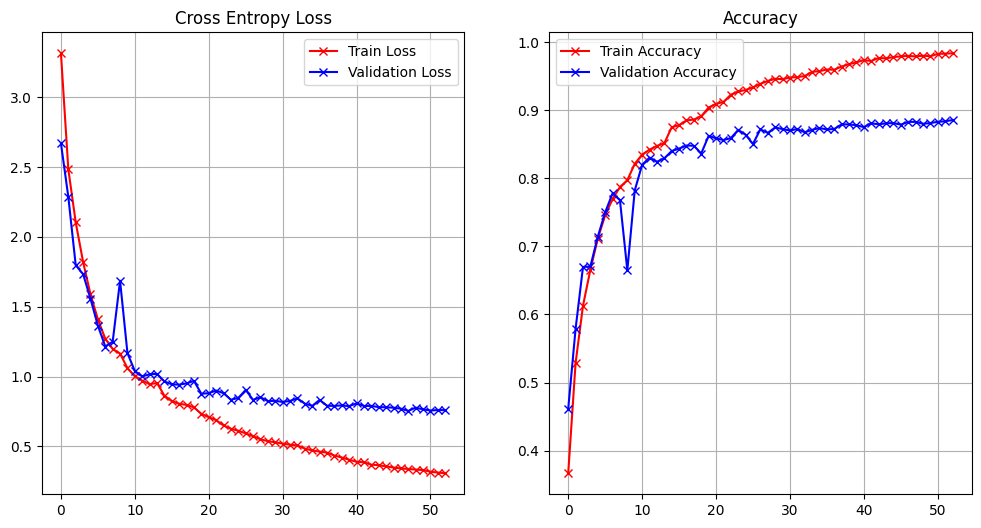

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model12.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.8, 
    patience=2, 
    min_lr=0.00001)

batch_size = 64
epoch = 80
opt = Adam(learning_rate=0.0004)

model_12.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_12 = model_12.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint, reduce_lr])
model12_time = time() - start
saved_model12 = load_model('model12.keras')
add_to_csv('Model 12',saved_model12,model12_time,'models.csv')
plot_loss_accuracy(history_12)

In [ ]:
l2_weight = .001
filter_start = 40
model_13 = Sequential(name='Model13')

#Input
model_13.add(Input(shape=x_train.shape[1:]))

#Conv1
model_13.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())
model_13.add(Conv2D(filter_start, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())

#Pooling1
model_13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_13.add(Dropout(0.3))

#Conv2
model_13.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())
model_13.add(Conv2D(filter_start*2, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())

#Pooling2
model_13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_13.add(Dropout(0.3))

#Conv3
model_13.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())
model_13.add(Conv2D(filter_start*4, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())

#Pooling3
model_13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_13.add(Dropout(0.3))

#Conv4
model_13.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())
model_13.add(Conv2D(filter_start*8, (3, 3), strides=(1,1), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model_13.add(BatchNormalization())

#Pooling4
model_13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_13.add(Dropout(0.3))

#Flatten
model_13.add(Flatten())

#Dense3 - softmax
model_13.add(Dropout(0.5))
model_13.add(Dense(num_classes,activation='softmax'))

model_13.summary()

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=1, 
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='model123.keras', 
    monitor='val_accuracy', 
    save_best_only=True, 
    verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.8, 
    patience=2, 
    verbose=1,
    min_lr=0.00001)

batch_size = 64
epoch = 80
opt = Adam(learning_rate=0.0004)

model_12.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
history_12 = model_12.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping, model_checkpoint, reduce_lr])
model12_time = time() - start
saved_model12 = load_model('model12.keras')
add_to_csv('Model 12',saved_model12,model12_time,'models.csv')
plot_loss_accuracy(history_12)

#### Conclusion


#type your answer here
